# Scheduler

It is a mandatory component of diffusion processes. It is used in the forward and denoising processes.
In the forward process, it is in charge of adding noises to the input images according the step and noises characteristics.
In the denoising porocess, it is used to remove noises in order to generate output image according to the steps.
The doc is here: https://huggingface.co/docs/diffusers/api/schedulers/overview

### DDPM

Original scheduler with default time steps of 1000. This is slow with image generation du to the big time steps.

In [12]:
# import scheduler
from diffusers import DDPMScheduler

# load scheduler
# if we don't specify the subfolder, we will get error: 
# OSError: CompVis/stable-diffusion-v1-4 does not appear to have a file named scheduler_config.json.
# This is because the scheduler file is not in the root folder but in a subfolder called "scheduler"
scheduler = DDPMScheduler.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="scheduler", num_train_timesteps=10)

/home/Qingyi/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [13]:
# show the scheduler object
# the default values below can be changed when initilizing the object

scheduler

DDPMScheduler {
  "_class_name": "DDPMScheduler",
  "_diffusers_version": "0.24.0",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 10,
  "prediction_type": "epsilon",
  "sample_max_value": 1.0,
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 1,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null,
  "variance_type": "fixed_small"
}

In [21]:
# Note: don't assign values directly to the scheduler's attributes such as scheduler.timesteps = 100. If doing this on the fly, the attributes will get inconsistant values (see below results).

scheduler.set_timesteps(timesteps=[4,3,2,1,0])
scheduler.alphas_cumprod

# but we can change the inference steps on the fly.
scheduler.set_timesteps(num_inference_steps=5)

tensor([0.9991, 0.9977, 0.9955, 0.9924, 0.9882, 0.9828, 0.9761, 0.9679, 0.9581,
        0.9466])

In [14]:
# show all attributes and methods

dir(scheduler)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_compatibles',
 '_deprecated_kwargs',
 '_dict_from_json_file',
 '_get_compatibles',
 '_get_init_keys',
 '_get_variance',
 '_internal_dict',
 '_threshold_sample',
 '_upload_folder',
 'add_noise',
 'alphas',
 'alphas_cumprod',
 'betas',
 'compatibles',
 'config',
 'config_name',
 'custom_timesteps',
 'extract_init_dict',
 'from_config',
 'from_pretrained',
 'get_config_dict',
 'get_velocity',
 'has_compatibles',
 'ignore_for_config',
 'init_noise_sigma',
 'load_config',
 'num_inference_steps',
 'one',
 'order',
 'previous_timestep',
 'push_to_hub',
 'register_to_config',
 'save_config',
 'save_p

In [15]:
# show the config of the schduler
# this is generated when instanciate the scheduler object using the provided config.json file.

scheduler.config

FrozenDict([('num_train_timesteps', 10),
            ('beta_start', 0.00085),
            ('beta_end', 0.012),
            ('beta_schedule', 'scaled_linear'),
            ('trained_betas', None),
            ('variance_type', 'fixed_small'),
            ('clip_sample', False),
            ('prediction_type', 'epsilon'),
            ('thresholding', False),
            ('dynamic_thresholding_ratio', 0.995),
            ('clip_sample_range', 1.0),
            ('sample_max_value', 1.0),
            ('timestep_spacing', 'leading'),
            ('steps_offset', 1),
            ('_use_default_values',
             ['variance_type',
              'sample_max_value',
              'thresholding',
              'clip_sample_range',
              'timestep_spacing',
              'dynamic_thresholding_ratio',
              'prediction_type']),
            ('_class_name', 'DDPMScheduler'),
            ('_diffusers_version', '0.24.0'),
            ('set_alpha_to_one', False),
            ('skip_pr

In [16]:
# show the steps

scheduler.timesteps

tensor([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [17]:
# show betas

scheduler.betas

tensor([0.0008, 0.0015, 0.0022, 0.0031, 0.0042, 0.0054, 0.0068, 0.0084, 0.0101,
        0.0120])

### DDIM

This can use fewer time steps for inference, hence, faster image generation.

In [28]:
from diffusers import DDIMScheduler

# by default, the time steps for training and inference are 1000
ddim =  DDIMScheduler.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="scheduler")

ddim

DDIMScheduler {
  "_class_name": "DDIMScheduler",
  "_diffusers_version": "0.24.0",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "rescale_betas_zero_snr": false,
  "sample_max_value": 1.0,
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 1,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null
}

In [29]:
# we set smaller inference time steps

ddim.set_timesteps(num_inference_steps=20)
ddim.timesteps

tensor([951, 901, 851, 801, 751, 701, 651, 601, 551, 501, 451, 401, 351, 301,
        251, 201, 151, 101,  51,   1])

### comparison of inference speed

In [31]:
%time
# using DDPM
from diffusers import DDPMPipeline
pipe = DDPMPipeline.from_pretrained("google/ddpm-celebahq-256")
images = pipe()

CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 16 µs


/home/Qingyi/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model_index.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors not found


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
%time
# using DDIM
from diffusers import DDIMPipeline
pipe = DDIMPipeline.from_pretrained("google/ddpm-celebahq-256")
images = pipe(num_inference_steps=50)

## Align Your Steps (AYS)

To optimize the sampling to produce high-quality images. 
It contains precomputed steps.
The doc is here: https://research.nvidia.com/labs/toronto-ai/AlignYourSteps/

In [40]:
# import 

from diffusers.schedulers import AysSchedules

print(AysSchedules)

{'StableDiffusionTimesteps': [999, 850, 736, 645, 545, 455, 343, 233, 124, 24], 'StableDiffusionSigmas': [14.615, 6.475, 3.861, 2.697, 1.886, 1.396, 0.963, 0.652, 0.399, 0.152, 0.0], 'StableDiffusionXLTimesteps': [999, 845, 730, 587, 443, 310, 193, 116, 53, 13], 'StableDiffusionXLSigmas': [14.615, 6.315, 3.771, 2.181, 1.342, 0.862, 0.555, 0.38, 0.234, 0.113, 0.0], 'StableDiffusionVideoSigmas': [700.0, 54.5, 15.886, 7.977, 4.248, 1.789, 0.981, 0.403, 0.173, 0.034, 0.0]}


In [46]:
# choose a corresponding array of steps

ays = AysSchedules["StableDiffusionTimesteps"]
ays

[999, 850, 736, 645, 545, 455, 343, 233, 124, 24]

In [43]:
pipe.scheduler

DDIMScheduler {
  "_class_name": "DDIMScheduler",
  "_diffusers_version": "0.29.2",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "rescale_betas_zero_snr": false,
  "sample_max_value": 1.0,
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 1,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null
}

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

[W NNPACK.cpp:61] Could not initialize NNPACK! Reason: Unsupported hardware.


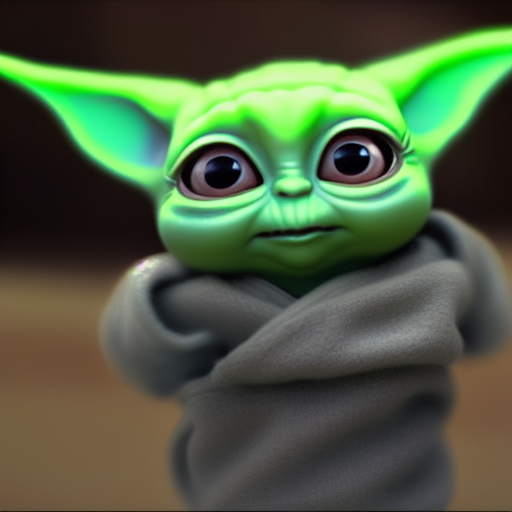

In [49]:
# usage

# so instead of 1000 steps, it needs 10 steps to do the generation

# note: the DDIMScheduler didn't work with ays

import torch
from diffusers import StableDiffusionPipeline, DDPMScheduler

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

pipe.scheduler = DDPMScheduler.from_config(pipe.scheduler.config)

prompt = "A cinematic shot of a cute baby yoda doing a thumbs up"

generator = torch.Generator(device="cpu").manual_seed(43)

img = pipe(prompt=prompt, negative_prompt="", generator=generator, timesteps=ays,).images[0]

img


  0%|          | 0/50 [00:00<?, ?it/s]

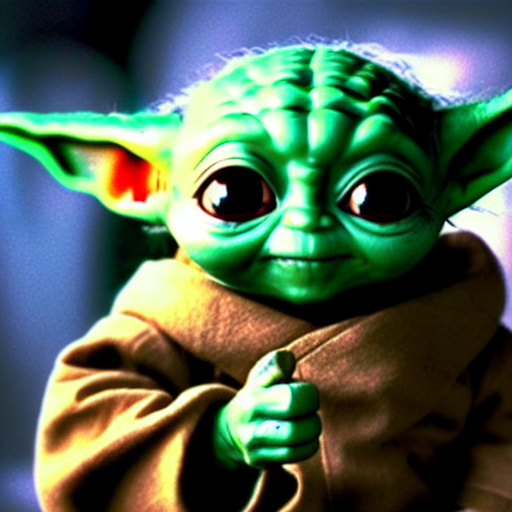

In [50]:
img = pipe(prompt=prompt, negative_prompt="", generator=generator).images[0]

img

## timestep spacing

This is defined by the member "timestep_spacing" of the scheduler.
There are 3 types of spacing:
 - "leading": evenly spaced steps, this is the default value
 - "linspace": evenly spaced steps by including the 1st and the last of the steps
 - "trailing": evenly spaced steps by including only the last step

HF recommands to use the trailing and says it generates better quality result.

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

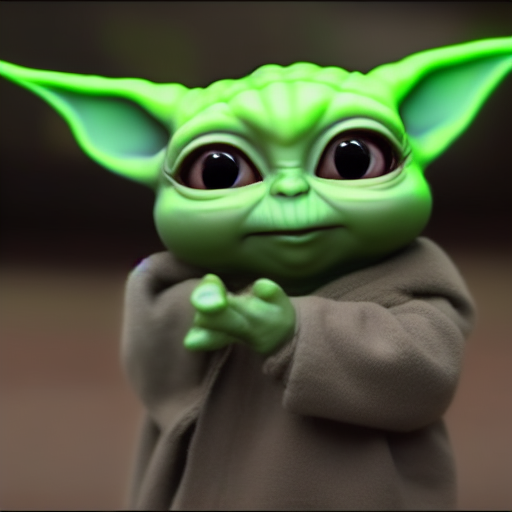

In [52]:
# use trailing

import torch
from diffusers import StableDiffusionPipeline, DDPMScheduler

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

pipe.scheduler = DDPMScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing")

prompt = "A cinematic shot of a cute baby yoda doing a thumbs up"

generator = torch.Generator(device="cpu").manual_seed(43)

img_trailing = pipe(prompt=prompt, negative_prompt="", generator=generator, num_inference_steps=10).images[0]

img_trailing


## sigma

TODO: the effect of sigma

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

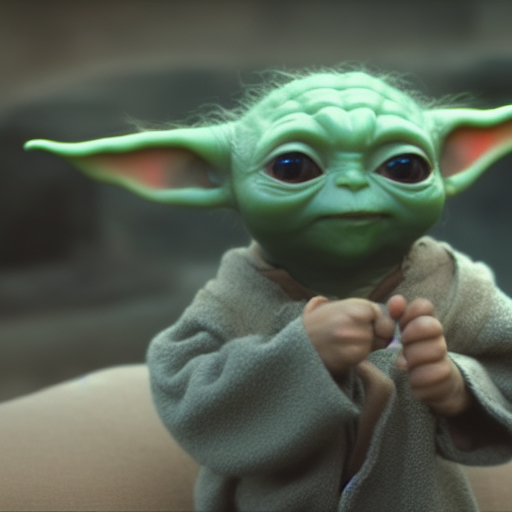

In [54]:
import torch
from diffusers.schedulers import AysSchedules
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing")

sigmas = AysSchedules["StableDiffusionSigmas"]

prompt = "A cinematic shot of a cute baby yoda doing a thumbs up"

generator = torch.Generator(device="cpu").manual_seed(43)

img_sigma = pipe(prompt=prompt, negative_prompt="", generator=generator, sigmas=sigmas, num_inference_steps=10).images[0]

img_sigma

## Karras sigmas

The model should be trained using this parameters.
Refer the list of schedulers which can use this option: https://huggingface.co/docs/diffusers/api/schedulers/overview

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

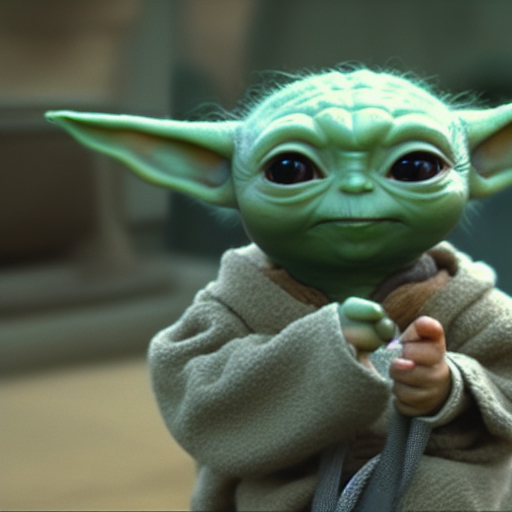

In [56]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config, use_kerras_sigmas=True)

prompt = "A cinematic shot of a cute baby yoda doing a thumbs up"

generator = torch.Generator(device="cpu").manual_seed(43)

img_kerras = pipe(prompt=prompt, negative_prompt="", generator=generator, num_inference_steps=10).images[0]

img_kerras

## scale

By default, this option is set to false.

For inference, you need a model that has been trained with "v_prediction".

safety checker: https://arxiv.org/pdf/2210.04610v5.pdf

In [64]:
print(pipe.requires_safety_checker)

False


/home/niuniu/Documents/DL_pytorch/diffuser/lib64/python3.12/site-packages/diffusers/configuration_utils.py:140: FutureWarning: Accessing config attribute `requires_safety_checker` directly via 'StableDiffusionPipeline' object attribute is deprecated. Please access 'requires_safety_checker' over 'StableDiffusionPipeline's config object instead, e.g. 'scheduler.config.requires_safety_checker'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/634 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/730 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

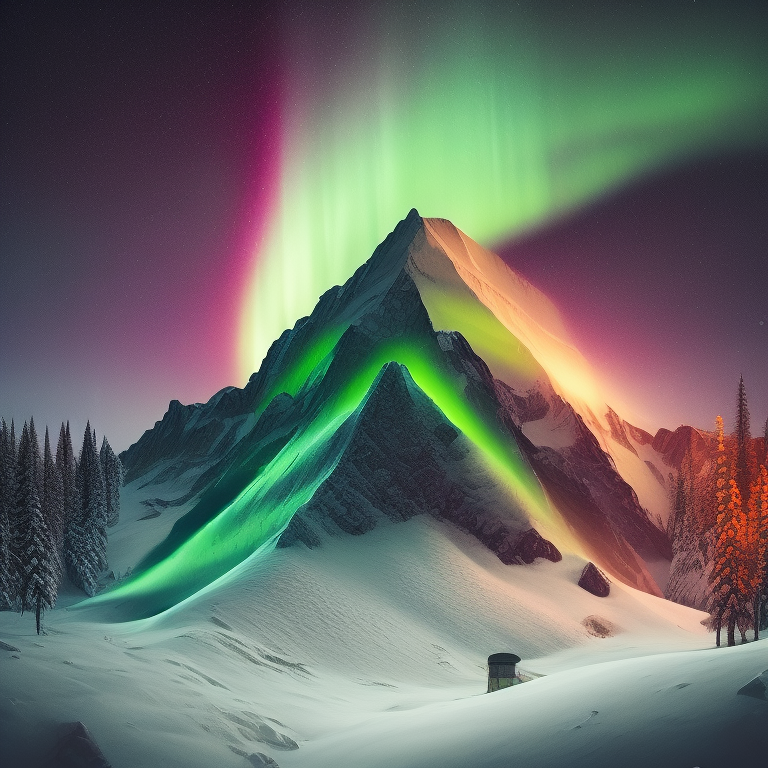

In [84]:
import torch
from diffusers import DiffusionPipeline, DDIMScheduler

pipe = DiffusionPipeline.from_pretrained("ptx0/pseudo-journey-v2", safety_checker = None).to("cpu")

pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing", rescale_betas_zero_snr=True)

prompt = "cinematic photo of a snowy mountain at night with the northern lights aurora borealis overhead"

generator = torch.Generator(device="cpu").manual_seed(43)

img_scale = pipe(prompt=prompt, guidance_rescale=0.7, generator=generator, num_inference_steps=10).images[0]

img_scale